In [1]:
import pandas as pd

In [2]:
fd = pd.read_csv('train (3).csv')

In [3]:
fd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


WITH NUMERICAL_COLUMNS

In [4]:
fd = fd[['Survived','Age','Fare']]

In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
fd.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
fd.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [8]:
x = fd.drop(columns=['Survived'])
y = fd['Survived']

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y ,random_state=1 ,test_size=0.2 )


In [10]:
x_train['age_impute'] = x_train['Age']
x_test['age_impute'] = x_test['Age']

In [11]:
x_test.shape , x_train.shape

((179, 3), (712, 3))

In [12]:
x_train.tail()

,Age,Fare,age_impute
715,19.0,7.65,19.0
767,30.5,7.75,30.5
72,21.0,73.50,21.0
235,NaN,7.55,NaN
37,21.0,8.05,21.0


In [13]:
# put the null values of age_impute in the x_train['age_imp']
x_train['age_impute'][x_train['age_impute'].isnull()].sample(5)

,age_impute
839,NaN
495,NaN
64,NaN
527,NaN
303,NaN


In [14]:
# drop all the nan values from the agecolumns and take any sample2 values fromthatcolumn
x_train['Age'].dropna()

x_train['Age'].dropna().sample(2)

,Age
734,23.0
515,47.0


In [15]:
#but put missing_values_whicharemissing entirely

x_train['Age'].dropna().sample(x_train['Age'].isnull().sum())
x_train['Age'].dropna().sample(2).values # take any two_values

array([46.,  5.])

In [16]:
#so replacing allthevalues_of age_impute whichare nan with anyof samplevalue_of Age
x_train['age_impute'][x_train['age_impute'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

/tmp/ipython-input-16-1678883682.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_impute'][x_train['age_impute'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [17]:

x_test['age_impute'][x_test['age_impute'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-17-1241410211.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['age_impute'][x_test['age_impute'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [18]:
x_train['Age'].isnull().sum()

np.int64(144)

In [19]:
x_train.tail()   #no_missingwith age_impute

,Age,Fare,age_impute
715,19.0,7.65,19.0
767,30.5,7.75,30.5
72,21.0,73.50,21.0
235,NaN,7.55,35.0
37,21.0,8.05,21.0


DISTRIBUTION OF BOTH_COL'S

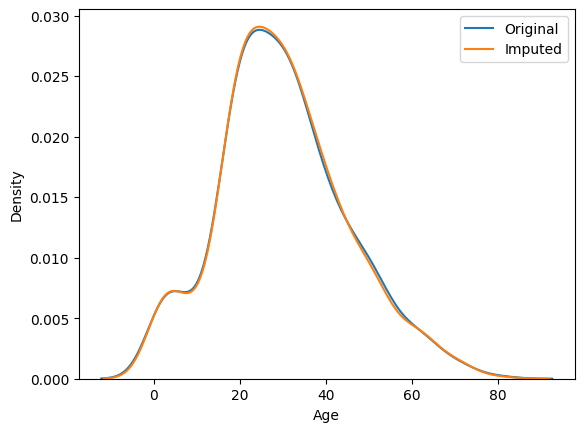

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x_train['Age'] , label='Original')
sns.kdeplot(x_train['age_impute'] ,  label='Imputed')

plt.legend()

# veryoverlapping_eachothermuch

In [21]:
# same asdistribution the variance remains same in random_distribution
print('Original Age variance : -' , x_train['Age'].var())
print('Age variance after random imputation: -' , x_train['age_impute'].var())

Original Age variance : - 220.7125508594779
Age variance after random imputation: - 218.07331424149424


In [22]:
# co-variance varies
x_train[['Fare','Age','age_impute']].cov()

,Fare,Age,age_impute
Fare,2144.981210,74.406949,57.726518
Age,74.406949,220.712551,220.712551
age_impute,57.726518,220.712551,218.073314


WITH CATEGORICAL_COLUMNS

In [23]:
fd = pd.read_csv('house-train.csv')
# fd = pd.read_csv('house-train.csv',usecols=['GarageQual','foreplaceQu','Saleprice'])

In [24]:
fd

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
fd=fd[['GarageQual','FireplaceQu','SalePrice']] # pandas_accept_list ofstrings

In [26]:
fd

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [27]:
# check the nullvalues to selectthe_cols
fd.isnull().mean()*100
fd.isnull().sum()

,0
GarageQual,81
FireplaceQu,690
SalePrice,0


In [28]:
x = fd.drop(columns=['SalePrice'])
y = fd['SalePrice']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)


In [30]:
x_train['GarageQual_imp'] = x_train['GarageQual']
x_test['GarageQual_imp'] = x_test['GarageQual']

x_train['FireplaceQu_imp'] = x_train['FireplaceQu']
x_test['FireplaceQu_imp'] = x_test['FireplaceQu']

In [31]:
x_train.tail()

,GarageQual,FireplaceQu,GarageQual_imp,FireplaceQu_imp
466,TA,Po,TA,Po
299,TA,Gd,TA,Gd
493,TA,Fa,TA,Fa
527,TA,Gd,TA,Gd
1192,TA,NaN,TA,NaN


In [32]:
x_train.isnull().sum()


,0
GarageQual,65
FireplaceQu,557
GarageQual_imp,65
FireplaceQu_imp,557


In [33]:
x_test.isnull().sum()

,0
GarageQual,16
FireplaceQu,133
GarageQual_imp,16
FireplaceQu_imp,133


In [34]:
# put the null values of GarageQual_impute in itself
x_train['GarageQual_imp'][x_train['GarageQual_imp'].isnull()]

,GarageQual_imp
127,NaN
99,NaN
921,NaN
1179,NaN
1143,NaN
...,...
434,NaN
942,NaN
1326,NaN
1349,NaN


In [35]:
# replace the null values entirely in the GarageQual
x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values


array(['TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

In [36]:
x_train['GarageQual_imp'][x_train['GarageQual_imp'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual_imp'].isnull().sum()).values
x_test['GarageQual_imp'][x_test['GarageQual_imp'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual_imp'].isnull().sum()).values



/tmp/ipython-input-36-3487731157.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imp'][x_train['GarageQual_imp'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual_imp'].isnull().sum()).values
/tmp/

In [37]:
x_train['FireplaceQu_imp'][x_train['FireplaceQu_imp'].isnull()]

,FireplaceQu_imp
863,NaN
1091,NaN
590,NaN
1446,NaN
453,NaN
...,...
725,NaN
587,NaN
607,NaN
1287,NaN


In [44]:
x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu_imp'].isnull().sum()).values


array([], dtype=object)

In [45]:
x_train['FireplaceQu_imp'][x_train['FireplaceQu_imp'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imp'][x_test['FireplaceQu_imp'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-45-3611661425.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['FireplaceQu_imp'][x_test['FireplaceQu_imp'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values


In [46]:
x_train.tail()

,GarageQual,FireplaceQu,GarageQual_imp,FireplaceQu_imp
466,TA,Po,TA,Po
299,TA,Gd,TA,Gd
493,TA,Fa,TA,Fa
527,TA,Gd,TA,Gd
1192,TA,NaN,TA,Gd
